# Machine Learning Nanodegree Capstone Project

Every year, approximately 7.6 million companion animals end up in US shelters. Many animals are given up as unwanted by their owners, while others are picked up after getting lost or taken out of cruelty situations. Many of these animals find forever families to take them home, but just as many are not so lucky. 

Approximately 2.7 million shelter animals are euthanized in the US every year.

In this multi-class classification problem, a dataset of intake information (breed, color, sex, age, etc.) provided by the Austin Animal Center will be used to train a supervised learning algorithm. The trained model will then be utilized to help predict the outcome (adoption, died, euthanasia, return to owner or transfer) of future shelter animals.

Knowing the predicted outcomes can help shelters identify and understand trends in animal outcomes. Such insights could help shelters focus their resources on specific animals who might need extra help finding a new home. For example, if the predicted outcome for a certain animal or breed in a shelter is euthanasia, the shelter could align their efforts to help see these euthanasia candidates find a new home.

I intend to follow the workflow outline below as closely as possible:

- Step 1: Problem Preparation
  - Load libraries
  - Load dataset

- Step 2: Data Summarization
  - Descriptive statistics such as .info(), .describe(), .head() and .shape
  - Data visualization such as histograms, density plots, box plots, scatter matrix and correlation matrix

- Step 3: Data Preparation
  - Data cleaning such as handling missing values
  - Feature preparation and data transforms such as one-hot encoding

- Step 4: Evaluate Algorithm(s)
  - Split-out validation dataset
  - Test options and evaluation metric
  - Spot check and compare algorithms

- Step 5: Improve Algorithm(s)
  - Algorithm tuning
  - Compare selected algorithm against Ensembles

- Step 6: Model Finalization
  - Predictions on validation / test dataset

## Problem Preparation

In this step, I am loading the necessary Python libraries and dataset.

In [68]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
%matplotlib inline

# Load dataset
filepath = 'data/train.csv'
data = pd.read_csv(filepath)

## Data Exploration

My aim was to learn more about the data through descriptive statistics and data visualization. I utilized info(), describe(), head(), shape along with value_counts, isnull() and class distribution. Regarding data visualization, I plotted two bar charts and one line chart.

In [31]:
# Displaying the first five records of the dataset
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [32]:
# Displaying the dimensions of the dataset
print('Number of observations: %s' % data.shape[0])
print('Number of attributes: {}'.format(data.shape[1]))

Number of observations: 26729
Number of attributes: 10


In [33]:
# Displaying detailed information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [34]:
y = data['AnimalType'].value_counts()
y

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

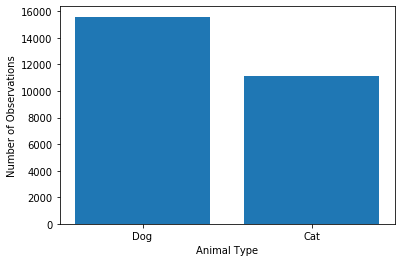

In [35]:
x = ['Dog', 'Cat']
plt.bar(x, y)
plt.xlabel('Animal Type')
plt.ylabel('Number of Observations')
plt.show()

In [36]:
y = data['SexuponOutcome'].value_counts()
y

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

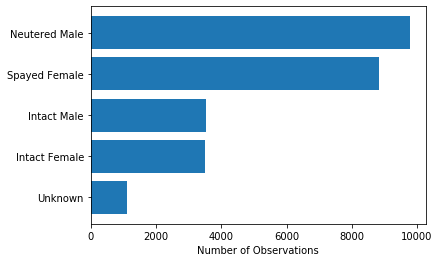

In [37]:
fig, ax = plt.subplots()
sex = ['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', 'Unknown']
y_pos = np.arange(len(sex))
ax.barh(y_pos, y)
ax.set_yticks(y_pos)
ax.set_yticklabels(sex)
plt.xlabel('Number of Observations')
ax.invert_yaxis()
plt.show()

In [38]:
data['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
4 days         50
6 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [39]:
data['Breed'].value_counts()

Domestic Shorthair Mix                            8810
Pit Bull Mix                                      1906
Chihuahua Shorthair Mix                           1766
Labrador Retriever Mix                            1363
Domestic Medium Hair Mix                           839
German Shepherd Mix                                575
Domestic Longhair Mix                              520
Siamese Mix                                        389
Australian Cattle Dog Mix                          367
Dachshund Mix                                      318
Boxer Mix                                          245
Miniature Poodle Mix                               233
Border Collie Mix                                  229
Australian Shepherd Mix                            163
Rat Terrier Mix                                    157
Catahoula Mix                                      157
Jack Russell Terrier Mix                           146
Domestic Shorthair                                 143
Yorkshire 

In [40]:
data['Color'].value_counts()

Black/White                2824
Black                      2292
Brown Tabby                1635
Brown Tabby/White           940
White                       931
Brown/White                 884
Orange Tabby                841
Tan/White                   773
Tricolor                    752
Blue/White                  702
Black/Tan                   672
White/Black                 643
Brown                       639
Tan                         628
White/Brown                 569
Tortie                      530
Calico                      517
Orange Tabby/White          455
Blue                        450
Brown Brindle/White         450
Black/Brown                 436
Blue Tabby                  433
White/Tan                   389
Red                         337
Torbie                      335
Brown/Black                 333
Red/White                   331
Blue Tabby/White            241
Brown Brindle               232
Chocolate/White             224
                           ... 
Orange T

In [41]:
# Identify which observations are null for the AgeuponOutcome feature
data.AgeuponOutcome[data.AgeuponOutcome.isnull()]

2480     NaN
2912     NaN
3766     NaN
3875     NaN
4498     NaN
5137     NaN
5691     NaN
7005     NaN
8420     NaN
17464    NaN
18490    NaN
19927    NaN
21523    NaN
22380    NaN
22448    NaN
24328    NaN
26551    NaN
26570    NaN
Name: AgeuponOutcome, dtype: object

In [42]:
# Identify which observation is null for the SexuponOutcome feature
data.SexuponOutcome[data.SexuponOutcome.isnull()]

3174    NaN
Name: SexuponOutcome, dtype: object

In [43]:
# Display class distribution
y = data.groupby('OutcomeType').size()
y

OutcomeType
Adoption           10769
Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
dtype: int64

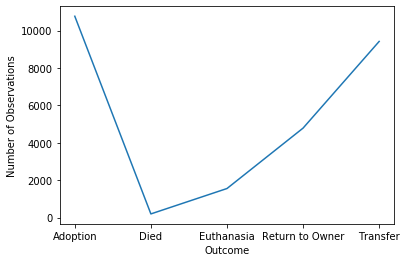

In [44]:
x = ['Adoption', 'Died', 'Euthanasia', 'Return to Owner', 'Transfer']
plt.xlabel('Outcome')
plt.ylabel('Number of Observations')
plt.plot(x, y)

## Data Preparation

For data preparation, I decided to split the dataset into two segments: Cat and Dog.

- Cat contains only Cats
- Dog contains only Dogs

### Cat

In [45]:
# Create new dataframe
cat = data.copy()

# Narrow dataframe to 'Cat' only
cat = cat[cat['AnimalType'] == 'Cat']

# Drop observations from features with NaN
cat = cat.dropna(subset=['AgeuponOutcome', 'SexuponOutcome'])

# Filter out observations with 'Unknown'
cat = cat[cat.SexuponOutcome != 'Unknown']

# Cat names below threshold are replaced with 'Known'
cat_names = cat['Name'].value_counts()
cat_names = cat_names[cat_names < 50]
cat_names = list(cat_names.index)
cat['Name'].replace(to_replace=cat_names, value='Known', inplace=True)

# Cat names with NaN replaced with 'Unknown'
cat['Name'] = cat['Name'].fillna('Unknown')

# Split dataset into features and target variable
cat_y = cat[['OutcomeType']]
cat = cat.drop(['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'], axis=1)

# Convert age to number of days
cat['AgeuponOutcome'] = cat['AgeuponOutcome'].apply(util.convertAgeToDays)

# 'Mix' and '/' removed from Breed and Color features
cat['Breed'] = cat['Breed'].apply(util.getBreed)
cat['Color'] = cat['Color'].apply(util.getColor)

# Cat breeds below threshold are replaced with 'Other'
cat_breeds = cat['Breed'].value_counts()
cat_breeds = cat_breeds[cat_breeds < 50]
cat_breeds = list(cat_breeds.index)
cat['Breed'].replace(to_replace=cat_breeds, value='Other', inplace=True)

# Cat colors below threshold are replaced with 'Other'
cat_colors = cat['Color'].value_counts()
cat_colors = cat_colors[cat_colors < 50]
cat_colors = list(cat_colors.index)
cat['Color'].replace(to_replace=cat_colors, value='Other', inplace=True)

# Scale AgeuponOutcome for Cats
scaler = MinMaxScaler()
cat_scaled = pd.DataFrame(data=cat)
numerical = ['AgeuponOutcome']
cat_scaled[numerical] = scaler.fit_transform(cat[numerical])

# Implement one-hot encoding for categorical features
cat_final = pd.get_dummies(cat_scaled)

### Dog

In [46]:
# Create new dataframe
dog = data.copy()

# Narrow dataframe to 'Dog' only
dog = dog[dog['AnimalType'] == 'Dog']

# Drop observations from features with NaN
dog = dog.dropna(subset=['AgeuponOutcome', 'SexuponOutcome'])

# Filter out observations with 'Unknown'
dog = dog[dog['SexuponOutcome'] != 'Unknown']

# Dog names below threshold are replaced with 'Known'
dog_names = dog['Name'].value_counts()
dog_names = dog_names[dog_names < 200]
dog_names = list(dog_names.index)
dog['Name'].replace(to_replace=dog_names, value='Known', inplace=True)

# Dog names with NaN replaced with 'Unknown'
dog['Name'] = dog['Name'].fillna('Unknown')

# Split dataset into features and target variable
dog_y = dog[['OutcomeType']]
dog = dog.drop(['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'], axis=1)

# Convert AgeuponOutcome to number of days
dog['AgeuponOutcome'] = dog['AgeuponOutcome'].apply(util.convertAgeToDays)

# 'Mix' and '/' removed from Breed and Color features
dog['Breed'] = dog['Breed'].apply(util.getBreed)
dog['Color'] = dog['Color'].apply(util.getColor)

# Dog breeds below threshold are replaced with 'Other'
dog_breeds = dog['Breed'].value_counts()
dog_breeds = dog_breeds[dog_breeds < 50]
dog_breeds = list(dog_breeds.index)
dog['Breed'].replace(to_replace=dog_breeds, value='Other', inplace=True)

# Dog colors below threshold are replaced with 'Other'
dog_colors = dog['Color'].value_counts()
dog_colors = dog_colors[dog_colors < 50]
dog_colors = list(dog_colors.index)
dog['Color'].replace(to_replace=dog_colors, value='Other', inplace=True)

# Scale AgeuponOutcome for Dogs
scaler = MinMaxScaler()
dog_scaled = pd.DataFrame(data=dog)
numerical = ['AgeuponOutcome']
dog_scaled[numerical] = scaler.fit_transform(dog[numerical])

# Implement one-hot encoding for categorical features
dog_final = pd.get_dummies(dog_scaled)

## Evaluate Algorithms

For algorithm evaluation, I used a 60/40 training/validation dataset split. The evaluation metric used was accuracy. I used k-fold cross validation.

For my benchmark, I used a Logistic Regression algorithm.

The Machine Learning algorithms I decided to use were:
- Decision Tree
- KNeighbors
- XGBoost
- Naive Bayes
- Support-Vector Machines

In [54]:
def modelSelection(final_x, final_y):
    
    # Split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.40, random_state=42)

    # Spot-check algorithms
    models = []
    models.append(('LG', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Benchmark model
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('XGB', XGBClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))

    results = []
    names = []

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=42)
        cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
    
        print('{}: {}'.format(name, cv_results.mean()))

In [55]:
modelSelection(cat_final, cat_y)

LG: 0.7234051352373491
CART: 0.7174676700975952
KNN: 0.7062483165051872
XGB: 0.7433612487382292
NB: 0.31865570728548537
SVM: 0.7204372869273736


In [56]:
modelSelection(dog_final, dog_y)

LG: 0.5616076154152941
CART: 0.5189597544948577
KNN: 0.5105825898899393
XGB: 0.5632189593504757
NB: 0.0755192656547333
SVM: 0.5360405889214477


## Algorithm Improvement

In order to improve the algorithm, I used hyperparameter tuning and Ensemble method comparison.

The Ensemble methods I decided to use were:
- AdaBoost
- Gradient Boosting
- Random Forest
- Extra Trees


In [60]:
# Cat
learning_rate = [0.05, 0.10, 0.15]
min_child_weight = [1, 3, 5]
gamma = [0.0, 0.1, 0.2, 0.3]
sample = [0.25, 0.50, 0.75]
param_grid = dict(learning_rate=learning_rate, min_child_weight=min_child_weight, subsample=sample, gamma=gamma)
model = XGBClassifier()
kfold = KFold(n_splits=3, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, iid=True)
grid_result = grid.fit(cat_final, cat_y.values.ravel())

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f, (%f) with: %r' % (mean, stdev, param))

Best: 0.740722 using {'gamma': 0.3, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.5}
0.738743, (0.003231) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.25}
0.739931, (0.002648) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.5}
0.739634, (0.003175) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.75}
0.738149, (0.003213) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.25}
0.740228, (0.002589) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.5}
0.739931, (0.003035) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.75}
0.739931, (0.002118) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.25}
0.740129, (0.003324) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.5}
0.739337, (0.002229) with: {'gamma': 0.0, 'lear

In [61]:
# Dog
learning_rate = [0.05, 0.10, 0.15]
min_child_weight = [1, 3, 5]
gamma = [0.0, 0.1, 0.2, 0.3]
sample = [0.25, 0.50, 0.75]
param_grid = dict(learning_rate=learning_rate, min_child_weight=min_child_weight, subsample=sample, gamma=gamma)
model = XGBClassifier()
kfold = KFold(n_splits=3, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, iid=True)
grid_result = grid.fit(dog_final, dog_y.values.ravel())

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f, (%f) with: %r' % (mean, stdev, param))

Best: 0.578371 using {'gamma': 0.3, 'learning_rate': 0.15, 'min_child_weight': 1, 'subsample': 0.75}
0.573279, (0.006430) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.25}
0.573344, (0.006216) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.5}
0.572312, (0.006213) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.75}
0.572764, (0.006752) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.25}
0.572570, (0.006609) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.5}
0.572248, (0.006475) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.75}
0.572506, (0.006737) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.25}
0.572312, (0.006289) with: {'gamma': 0.0, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.5}
0.572377, (0.006325) with: {'gamma': 0.0, 'lea

In [62]:
def modelEnsemble(final_x, final_y):
    
    # Split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.40, random_state=42)

    # Ensembles
    ensembles = []
    ensembles.append(('AB', AdaBoostClassifier()))
    ensembles.append(('GBM', GradientBoostingClassifier()))
    ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
    ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

    results = []
    names = []

    for name, model in ensembles:
        kfold = KFold(n_splits=5, random_state=42)
        cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
    
        print('{} {}'.format(name, cv_results.mean()))
        
    return X_train, X_test, y_train, y_test

In [63]:
cat_x_train, cat_x_test, cat_y_train, cat_y_test = modelEnsemble(cat_final, cat_y)

AB 0.693385871975491
GBM 0.7389074356734933
RF 0.716643811949208
ET 0.7199411491025443


In [64]:
dog_x_train, dog_x_test, dog_y_train, dog_y_test = modelEnsemble(dog_final, dog_y)

AB 0.5381888166335852
GBM 0.563111663398921
RF 0.5227195570102812
ET 0.5171336455054887


### Model Finalization


In [71]:
# Prepare the benchmark
print('Cat Benchmark------------------------------------------')
benchmark = LogisticRegression(solver='liblinear', multi_class='ovr')
benchmark.fit(cat_x_train, cat_y_train.values.ravel())

# Estimate accuracy on validation dataset
predictions = benchmark.predict(cat_x_test)
print('Accuracy:', accuracy_score(cat_y_test, predictions))
print('F1 Score:', f1_score(cat_y_test, predictions, average='weighted'))

# Prepare the model
print('Cat Model------------------------------------------')
model = XGBClassifier()
model.fit(cat_x_train, cat_y_train.values.ravel())

# Estimate accuracy on validation dataset
predictions = model.predict(cat_x_test)
print('Accuracy:', accuracy_score(cat_y_test, predictions))
print('F1 Score:', f1_score(cat_y_test, predictions, average='weighted'))

Cat Benchmark------------------------------------------
Accuracy: 0.7179614052449282
F1 Score: 0.6800011960087967
Cat Model------------------------------------------


C:\Users\paperspace\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.739980207817912
F1 Score: 0.7034159514762209


In [72]:
# Prepare the benchmark
print('Dog Benchmark------------------------------------------')
benchmark = LogisticRegression(solver='liblinear', multi_class='ovr')
benchmark.fit(dog_x_train, dog_y_train.values.ravel())

# Estimate accuracy on validation dataset
predictions = benchmark.predict(dog_x_test)
print('Accuracy:', accuracy_score(dog_y_test, predictions))
print('F1 Score:', f1_score(dog_y_test, predictions, average='weighted'))

# Prepare the model
print('Dog Model------------------------------------------')
model = XGBClassifier(gamma=0.3, learning_rate=0.15, min_child_weight=1, subsample=0.75)
model.fit(dog_x_train, dog_y_train.values.ravel())

# Estimate accuracy on validation dataset
predictions = model.predict(dog_x_test)
print('Accuracy:', accuracy_score(dog_y_test, predictions))
print('F1 Score:', f1_score(dog_y_test, predictions, average='weighted'))

Dog Benchmark------------------------------------------
Accuracy: 0.5783792492347349


C:\Users\paperspace\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.5436504242105691
Dog Model------------------------------------------
Accuracy: 0.5832125020138553
F1 Score: 0.5600396584941758
